In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
from utils import *
pytesseract.pytesseract.tesseract_cmd = r'E:\Downloads\Tesseract OCR\tesseract.exe'

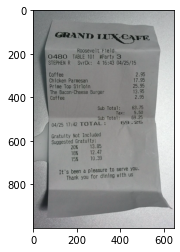

In [16]:
path = str('E:/Nitin/RVCE/Projects/PDF-OCR/Dataset/receipts/1002-receipt.jpg')

img = cv2.imread(path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
#img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# Performing OTSU threshold 
#ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
  
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
#rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
  
# Appplying dilation on the threshold image 
#dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
  
# Finding contours 
#
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
plt.imshow(img)
text = pytesseract.image_to_string(img) 
print(text)

In [29]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    #rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = img[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("MyFile.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
      
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 

In [ ]:
kernel = np.ones((5,5), np.uint8) 
img = cv2.erode()

In [6]:
text = pytesseract.image_to_string('result.png')
file1 = open("MyFile.txt","w") 
file1.write(text)

file1.close() 

In [1]:
import cv2
import numpy as np

## (1) read
img = cv2.imread("download.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90

## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))

## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

cv2.imwrite("result.png", rotated)


error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
import cv2
import numpy as np

# load image
img = cv2.imread("text_above_lines_threshold.png")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# use morphology erode to blur horizontally
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

# use morphology open to remove thin lines from dotted lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# find the topmost box
ythresh = 1000000
for c in cntrs:
    box = cv2.boundingRect(c)
    x,y,w,h = box
    if y < ythresh:
        topbox = box
        ythresh = y

# Draw contours excluding the topmost box
result = img.copy()
for c in cntrs:
    box = cv2.boundingRect(c)
    if box != topbox:
        x,y,w,h = box
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

# write result to disk
cv2.imwrite("text_above_lines_threshold.png", thresh)
cv2.imwrite("text_above_lines_morph.png", morph)
cv2.imwrite("text_above_lines_lines.jpg", result)

#cv2.imshow("GRAY", gray)
cv2.imshow("THRESH", thresh)
cv2.imshow("MORPH", morph)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()